<a href="https://colab.research.google.com/github/MetalGuru434/ANNTrade/blob/main/%D0%94%D0%97_PRO_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Обработка текстов с помощью нейронных сетей.

Дорогой студент!

В данном домашнем задании предоставляется возможность поработать с задачей по распознаванию позитивных и негативных отзывы людей по автомобилю Tesla. База для обучения содержит два текстовых файла с рядом строчных отзывов с мнением людей об автомобиле Tesla, соответственно негативного и позитивного содержания. Ссылка на скачивание базы уже включена в ноутбук задания.


Необходимо выполнить следующие действия:

  1. Загрузите базу по ссылке и подговьте файлы базы для обработки.
  2. Создайте обучающую и проверочную выборки, обратив особое внимание на балансировку базы: количество примеров каждого класса должно быть примерно одного порядка.
  3. Подготовьте выборки для обучения и обучите сеть. Добейтесь результата точности сети в 85-90% на проверочной выборке.
   


**Импорт библиотек, загрузка базы и подготовка её к предобработке.**

In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Загрузка датасетов из облака google
import gdown

# Для работы с файлами в Colaboratory
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/tesla.zip', None, quiet=True)

'tesla.zip'

**Деление общей базы отзывов на данные для обучения и проверки.**

In [ ]:
# Распаковка архива в папку writers
!unzip -qo tesla.zip -d tesla/

# Просмотр содержимого папки
!ls tesla

'Негативный отзыв.txt'	'Позитивный отзыв.txt'


**Загрузка текста из файлов, преобразование в одну строку.**

In [ ]:
# Объявляем функции для чтения файла. На вход отправляем путь к файлу
def read_text(file_name):

  # Задаем открытие нужного файла в режиме чтения
  read_file = open(file_name, 'r')

  # Читаем текст
  text = read_file.read()

  # Переносы строки переводим в пробелы
  text = text.replace("\n", " ")

  # Возвращаем текст файла
  return text

# Объявляем интересующие нас классы
class_names = ["Негативный отзыв", "Позитивный отзыв"]

# Считаем количество классов
num_classes = len(class_names)

**Тексты в один список.**

In [ ]:
import os
# Создаём список под тексты для обучающей выборки
texts_list = []

# Циклом проводим итерацию по текстовым файлам в папке отзывов
for j in os.listdir('/content/tesla/'):

  # Добавляем каждый файл в общий список для выборки
        texts_list.append(read_text('/content/tesla/' + j))

        # Выводим на экран сообщение о добавлении файла
        print(j, 'добавлен в обучающую выборку')

Негативный отзыв.txt добавлен в обучающую выборку
Позитивный отзыв.txt добавлен в обучающую выборку


In [ ]:
# Узнаем объём каждого текста в символах
texts_len = [len(text) for text in texts_list]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Выводим на экран  информационное сообщение
print(f'Размеры текстов по порядку (в символах):')

# Циклом проводим итерацию по списку с объёмами текстов
for text_len in texts_len:

  # Запускаем "счётчик" номера текста
  t_num += 1

  # Выводим на экран сообщение о номере и объёме текста
  print(f'Текст №{t_num}: {text_len}')

  # Вывод первых строк таблицы
print(texts_list[0][0:1223])

Размеры текстов по порядку (в символах):
Текст №1: 134535
Текст №2: 213381
После 170 на трассе она чувствует себя неуверенно.  Кстати сидения очень удобными тоже не назовёшь. ... Это моё личное впечатление об автомобиле. Шляпа, а не авто, все не продумано до мелочей. Пока это гаджет а не авто. Это не авто, а бренд. Стремнные материалы, стремно все. Прям фу фу фу и дизайн снаружи и внутри. Продал  слава богу, экран менять целое дело через полтора года , негодование обычно возникает из-за несостоявшихся обманутых ожиданий. Не нужно воспринимать теслу как эталон, верх совершенства и т.п. Относитесь к тесле как гаджету и тогда не будет несбывшихся ожиданий от него гаджету можно простить и заоблачную цену при скромных характеристиках и зазоры на дверях при выдвигающихся ручках дверей. Походу ещё один бот и видите как тезисы выкидывает не нужно воспринимать Теслу как эталон, Тесла это гаджет, который нет смысла покупать...  Как я уже и писал к предыдущему посту КАЧЕСТВО СБОРКИ ХРОМАЕТ! Я пар

Далее рассчитаем, сколько символов составит 80% объёма каждого текста, чтобы по полученному индексу отделить эти 80% на обучающую и оставшиеся 20% на проверочную выборку. Эти значения необходимы для подготовки деления на выборки слайсингом по индексу.

In [ ]:
# Создаём список с вложенным циклом по длинам текстов, где i - 100% текста, i/5 - 20% текста
train_len_shares = [(i - round(i/5)) for i in texts_len]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Циклом проводим итерацию по списку с объёмами текстов равными 80% от исходных
for train_len_share in train_len_shares:

  # Запускаем "счётчик" номера текста
  t_num += 1

  # Выводим на экран сообщение о номере и объёме текста в 80% от исходного
  print(f'Доля 80% от текста №{t_num}: {train_len_share} символов')

Доля 80% от текста №1: 107628 символов
Доля 80% от текста №2: 170705 символов


Импортируем функцию **chain()** для добавления текстов в каждую выборку.

---
 Дополнительная информация: ([База знаний УИИ  - **"Методы работы со списками: функция chain( )**"](https://colab.research.google.com/drive/1KJKg_WYD8Vq63cciOMBEEAhFpyPv0A0V?usp=sharing/))

---

Производём нарезку (метод слайсинга) по полученному ранее индексу для формирования текстов отдельно для обучающей(80%) и проверочной(20%) выборок:

In [ ]:
from itertools import chain

In [ ]:
# Списки под обучающую и тестовую выборки
train_texts, val_texts = [], []
train_labels, val_labels = [], []

# Разделяем тексты: 80 % – обучение, 20 % – проверка
for class_idx, (text, split_idx) in enumerate(zip(texts_list, train_len_shares)):
    train_texts.append(text[:split_idx])
    val_texts.append(text[split_idx:])
    train_labels.append(class_idx)
    val_labels.append(class_idx)

# Приводим метки к one‑hot-формату
y_train = utils.to_categorical(train_labels, num_classes)
y_val = utils.to_categorical(val_labels, num_classes)

# Токенизация и подготовка последовательностей
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_texts)

X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_val_seq = tokenizer.texts_to_sequences(val_texts)

max_len = 1000  # можно подобрать оптимальную длину
X_train = pad_sequences(X_train_seq, maxlen=max_len)
X_val = pad_sequences(X_val_seq, maxlen=max_len)

# Построение модели
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_val, y_val))

# После обучения можно вывести точность
print("Validation accuracy:", history.history['val_accuracy'][-1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6729 - val_accuracy: 1.0000 - val_loss: 0.6660
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.1237 - val_accuracy: 1.0000 - val_loss: 0.6600
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.6549
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 0.6522
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 5.4953e-05 - val_accuracy: 1.0000 - val_loss: 0.6505
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 7.9274e-06 - val_accuracy: 1.0000 - val_loss: 0.6493
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 4.8280e-06 - val_accuracy: 1.0000 - val_loss: 0.6482
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val

1. Загрузка данных и балансировка классов

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 198, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 198, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 198, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,399,681 (5.34 MB)

 Trainable params: 1,399,681 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5023 - loss: 0.6939 - val_accuracy: 0.6048 - val_loss: 0.6832
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7676 - loss: 0.5669 - val_accuracy: 0.7077 - val_loss: 0.5978
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9337 - loss: 0.1882 - val_accuracy: 0.6774 - val_loss: 0.6766
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9818 - loss: 0.0720 - val_accuracy: 0.6956 - val_loss: 1.0718
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9903 - loss: 0.0292 - val_accuracy: 0.6734 - val_loss: 1.2457
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9915 - loss: 0.0243 - val_accuracy: 0.6613 - val_loss: 1.3190
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9938 - loss: 0.0149 - val_accuracy: 0.6774 - val_loss: 1.4002
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9943 - loss: 0.0197 - val_accuracy: 0.6855 - v

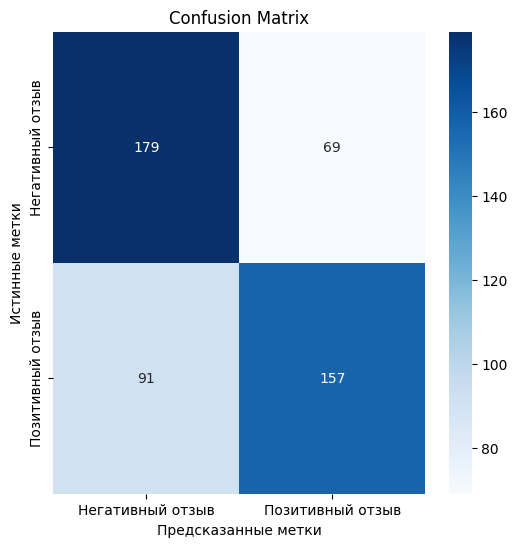


Classification Report:
                  precision    recall  f1-score   support

Негативный отзыв       0.66      0.72      0.69       248
Позитивный отзыв       0.69      0.63      0.66       248

        accuracy                           0.68       496
       macro avg       0.68      0.68      0.68       496
    weighted avg       0.68      0.68      0.68       496

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6642 - loss: 1.4420

Final Test Accuracy: 0.6774


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Загрузка и подготовка данных (ваш код)
def read_text(file_name):
    with open(file_name, 'r', encoding='utf-8') as f:
        text = f.read().replace("\n", " ")
    return text

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Удаляем пунктуацию
    text = re.sub(r'\d+', '', text)       # Удаляем цифры
    text = text.lower()                   # Приводим к нижнему регистру
    # Удаляем стоп-слова и лемматизируем
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

neg_text = read_text('/content/tesla/Негативный отзыв.txt')
pos_text = read_text('/content/tesla/Позитивный отзыв.txt')

# Применяем ко всем текстам
#neg_reviews = [clean_text(neg_text) for t in neg_text]
#pos_reviews = [clean_text(pos_text) for t in pos_text]

neg_reviews = [s.strip() for s in neg_text.split('.') if s.strip()]
pos_reviews = [s.strip() for s in pos_text.split('.') if s.strip()]

# Балансировка классов
min_len = min(len(neg_reviews), len(pos_reviews))
neg_reviews = neg_reviews[:min_len]
pos_reviews = pos_reviews[:min_len]

texts = neg_reviews + pos_reviews
labels = np.array([0]*min_len + [1]*min_len)

# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# 3. Токенизация
max_words = 20000
max_len = 200
embedding_dim = 128

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    Conv1D(64, 3, activation='relu'),  # Сначала ищем N-граммы
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_len))  # Явно указываем входную форму
model.summary()

# ... (предыдущий код до обучения модели)

# Обучаем модель
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

# Оцениваем точность
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"\nТочность на тестовых данных: {test_acc:.4f}")

# Предсказания модели
y_pred_proba = model.predict(X_test_pad)
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (точность, полнота, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Задание 2. Решение задачи регрессии с помощью нейронных сетей.

Дан датасет с результатами проведённых баскетбольных матчей. Необходимо сделать прогноз, сколько всего очков будет набрано обеими командами в матче.

Для каждой игры в датасете есть несколько строк, описывающие хронологию матча. В колонке "info" одинаковые записи соответствуют одному и тому же матчу.

* TOTAL  - результат работы алгоритма предсказания владельцев базы данных.
* info   - данные о матче: где, кто с кем играл - текстовые данные.
* Минута - минута периода, в которую записываются текущие результаты игры.
* Секунда - секунда, в которую записываются текущие результаты игры.
* Общая минута - минута матча (не периода, а всего матча), в которую записываются текущие результаты игры.
* ftime  - время в секундах, прошедшее с начала матча (т.е. ftime = 'Общая минута'*60 + 'Секунда').
* Ком. 1 - сколько мячей забила первая команда на момент записи результатов
* Ком. 2 - сколько мячей забила вторая команда на момент записи результатов.

* fcount - общая сумма забитых мячей в игре. Причём в каждой из строк, принадлежащей конкретному матчу, указана именнно общая сумма забитых мячей.


Необходимо научить нейросеть предсказывать количество набранных очков в матче (fcount).

Добейтесь средней абсолютной ошибки 17 и менее очков.

### Подготовка  

In [ ]:
# Загрузка из google облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l10/basketball.csv', None, quiet=True)

# Библиотека для работы с базами
import pandas as pd
df = pd.read_csv('basketball.csv', encoding= 'cp1251', sep=';', header=0, index_col=0) # Загружаем базу
df.head()

,TOTAL,info,Ком. 1,Ком. 2,Минута,Общая минута,Секунда,fcount,ftime
0,"98,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,0.0,1,1.0,30,81,90.0
1,"100,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,1,1.0,45,81,105.0
2,"99,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,2,2.0,0,81,120.0
3,"98,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,2,2.0,30,81,150.0
4,"95,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,3,3.0,0,81,180.0


Извлекаем текстовые данные из колонки `info` таблицы, помещаем в переменную `data_text`. Выводим длину списка:

In [ ]:
data_text = df['info'].values #

len(data_text) #

52450

Задаем максимальное кол-во слов в словаре, помещаем в переменную все символы, которые хотим вычистить из текста.

 Токенизируем текстовые данные:

In [ ]:
# Импортируем токенайзер
from tensorflow.keras.preprocessing.text import Tokenizer

maxWordsCount = 5000

sim_for_del='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

tokenizer = Tokenizer (num_words=maxWordsCount,
                       filters=sim_for_del,
                       lower=True,
                       split=' ',
                       oov_token='unknown',
                       char_level=False)

tokenizer.fit_on_texts(data_text)

In [ ]:
# Переводим в Эмбеддинг пространство
Sequences = tokenizer.texts_to_sequences(data_text)

# Вариант  Bag of Words
xBOW_text = tokenizer.sequences_to_matrix(Sequences)

Преобразуем данные в numpy, подготовим наборы для обучения:

In [ ]:
# Библиотека работы с массивами
import numpy as np

xTrain = np.array(df[['Ком. 1','Ком. 2', 'Минута', 'Секунда','ftime']].astype('int'))
yTrain = np.array(df['fcount'].astype('int'))

In [ ]:
print(xTrain.shape)
print(yTrain.shape)
print(xBOW_text.shape)

(52450, 5)
(52450,)
(52450, 5000)


In [ ]:
# Функция по проверке ошибки

def check_MAE_predictl_DubbleInput (model,
                                    x_data,
                                    x_data_text,
                                    y_data_not_scaled,
                                    plot=False):

  mae = 0 # Инициализируем начальное значение ошибки
  y_pred = (model.predict([x_data,x_data_text])).squeeze()

  for n in range (0,len(x_data)):
    mae += abs(y_data_not_scaled[n] - y_pred[n]) # Увеличиваем значение ошибки для текущего элемента
  mae /= len(x_data) # Считаем среднее значение
  print('Среднаяя абслолютная ошибка {:.3f} очков это {:.3f}% от общей выборки в {} игры'.format(mae, (mae/y_data_not_scaled.mean(axis=0))*100,len(x_data)))

  if plot:
     plt.scatter(y_data_not_scaled, y_pred)
     plt.xlabel('Правильные значение')
     plt.ylabel('Предсказания')
     plt.axis('equal')
     plt.xlim(plt.xlim())
     plt.ylim(plt.ylim())
     plt.plot([0, 250], [0, 250])
     plt.show()

In [ ]:
# ваше решение

# Задание 3. Обработка временных рядов с помощью нейронных сетей.

Обучите нейронную сеть для прогноза стоимости акций на данных, которые необходимо подготовить по инструкции, прописанной ниже.

Используйте базу акций Лукойла.

Задача 1. Сделайте несколько усовершенствований в предсказании временного ряда.
Добавьте к исходному сигналу расширенные данные:

* попарные разности каналов
* модули попарных разностей каналов
* попарные произведения каналов
* обратное значение каналов x_new = 1/(x + 1e-3)
* первые производные каналов (x[n] - x[n-1])
* вторые производные каналов (x[n] - 2*x[n-1] + x[n-2])

Задача 2. Примените абсолютно новый подход. Можно использовать исходный датасет без расширения (5 базовых столбцов). Сделайте бОльший “просмотр сети в прошлое”, при формировании входного сигнала используйте:

* 100 точек с шагом назад по 1,

* 100 точек с шагом назад по 10 (или сами точки, или среднее по отрезку в 10 точек).
* Объедините эти точки

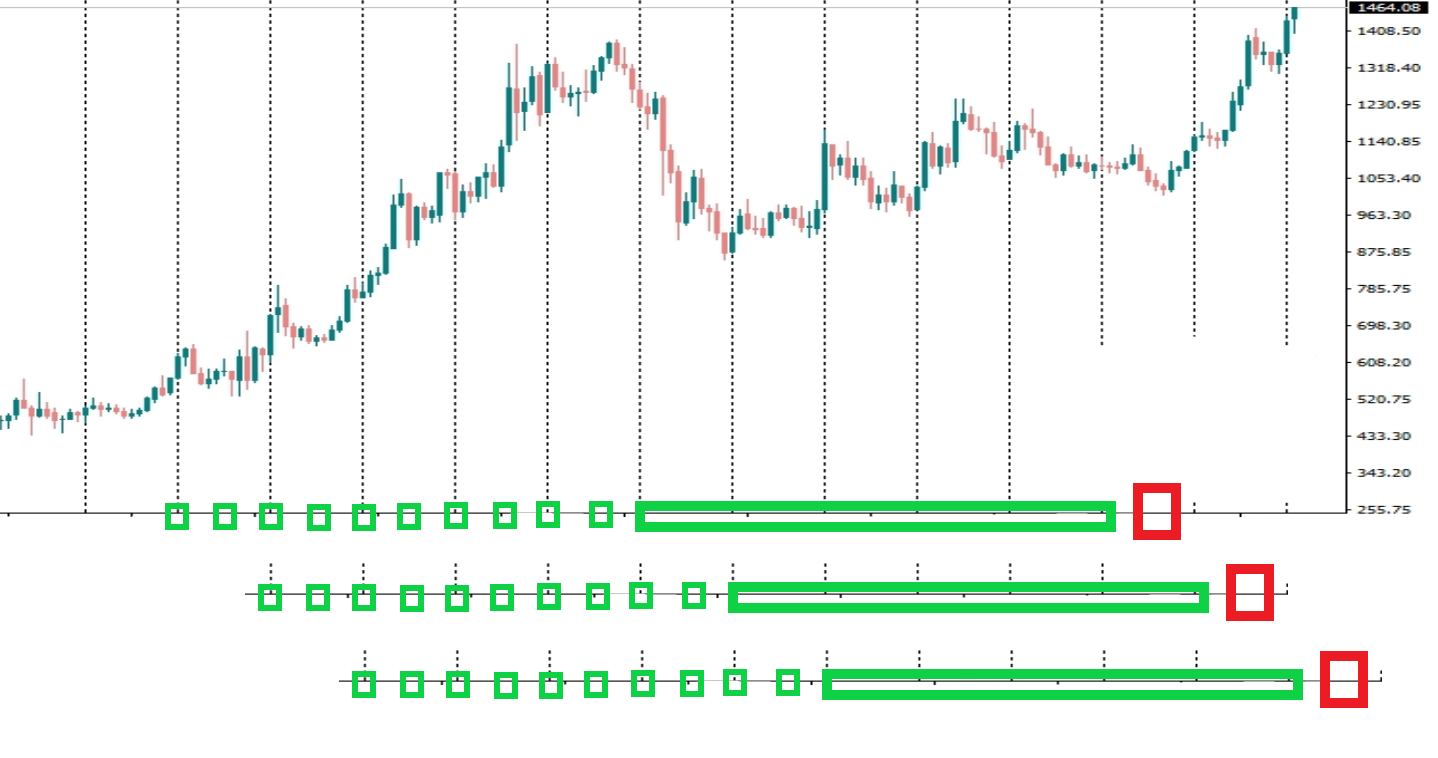

## Подготовка

In [ ]:
# Работа с массивами
import numpy as np

# Работа с таблицами
import pandas as pd

# Классы-конструкторы моделей нейронных сетей
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, LSTM, MaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Генератор выборки временных рядов
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Нормировщики
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Коллбэк
from tensorflow.keras.callbacks import LearningRateScheduler

# Загрузка датасетов из облака google
import gdown

# Отрисовка графиков
import matplotlib.pyplot as plt

# Отрисовка графики в ячейке colab
%matplotlib inline

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Назначение размера и стиля графиков по умолчанию

from pylab import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (14, 7)

In [ ]:
# Загрузка датасетов из облака

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l11/16_17.csv', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l11/18_19.csv', None, quiet=True)

'18_19.csv'

In [ ]:
# Чтение данных в таблицы с удалением ненужных столбцов

data16_17 = pd.read_csv('16_17.csv', sep=';').drop(columns=['DATE', 'TIME'])
data18_19 = pd.read_csv('18_19.csv', sep=';').drop(columns=['DATE', 'TIME'])

In [ ]:
# Просмотр размерностей получившихся таблиц

print(data16_17.shape)
print(data18_19.shape)

(263925, 5)
(217947, 5)


In [ ]:
# Создание общего набора данных из двух датасетов

data = pd.concat([data16_17,data18_19])   # Объединение датасетов
data = data.reset_index(drop = True)      # Обнуление индексов

# Проверка формы данных
print(data.shape)

(481872, 5)


In [ ]:
# Получение названий столбцов

col = data.columns
print(col)

Index(['OPEN', 'MAX', 'MIN', 'CLOSE', 'VOLUME'], dtype='object')


In [ ]:
# Задание циклов для столбцов таким образом, чтобы происходил перебор всех возможных пар:
# Перебор индексов массива с именами столбцов 'OPEN', 'MAX', 'MIN', 'CLOSE', 'VOLUME',
# получая пары 'OPEN' и 'MAX', 'OPEN' и 'MIN', 'OPEN' и 'CLOSE' ..., 'MAX' и 'MIN', 'MAX' и 'CLOSE' и т.д

for i in range(col.shape[0]): # Для всех пар
    for j in range(i + 1 , col.shape[0]): # Расчет
        data[col[i] + '-' + col[j]] = data[col[i]] - data[col[j]] # Разности
        data['|' + col[i] + '-' + col[j] + '|'] = abs(data[col[i]] - data[col[j]]) # Модулей разностей
        data[col[i] + '*' + col[j]] = data[col[i]] * data[col[j]] # Произведения

# Для каждого столбца 'OPEN', 'MAX', 'MIN', 'CLOSE', 'VOLUME' расчет:
for i in col:
    # Обратные значения. 1e-3 в формуле нужно, чтобы случайно не разделить на 0
    data['Обратный ' + i] = 1 / (data[i] + 1e-3)
    # Создание пустого столбца
    data['Производная от ' + i] = np.nan
    # При помощи срезов расчет первых производных, .reset_index(drop=True) нужен для корректных расчетов
    data['Производная от ' + i][1:] = data[i][1:].reset_index(drop=True) - data[i][:-1].reset_index(drop=True)
    # Создание пустого столбца
    data['Вторая производная от ' + i] = np.nan
    # При помощи срезов расчет вторых производных
    data['Вторая производная от ' + i][2:] = data[i][2:].reset_index(drop=True) - 2 * data[i][1:-1].reset_index(drop=True) + data[i][:-2].reset_index(drop=True)


In [ ]:
# Просмотр результатов
data

,OPEN,MAX,MIN,CLOSE,VOLUME,OPEN-MAX,|OPEN-MAX|,OPEN*MAX,OPEN-MIN,|OPEN-MIN|,...,Вторая производная от MAX,Обратный MIN,Производная от MIN,Вторая производная от MIN,Обратный CLOSE,Производная от CLOSE,Вторая производная от CLOSE,Обратный VOLUME,Производная от VOLUME,Вторая производная от VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,4.8,5538485.80,1.0,1.0,...,NaN,0.000426,NaN,NaN,0.000426,NaN,NaN,0.000393,NaN,NaN
1,2352.9,2355.7,2350.0,2355.7,195,-2.8,2.8,5542726.53,2.9,2.9,...,NaN,0.000426,0.0,NaN,0.000425,5.7,NaN,0.005128,-2352.0,NaN
2,2355.6,2356.0,2351.4,2354.1,257,-0.4,0.4,5549793.60,4.2,4.2,...,0.4,0.000425,1.4,1.4,0.000425,-1.6,-7.3,0.003891,62.0,2414.0
3,2354.5,2355.0,2351.2,2353.7,763,-0.5,0.5,5544847.50,3.3,3.3,...,-1.3,0.000425,-0.2,-1.6,0.000425,-0.4,1.2,0.001311,506.0,444.0
4,2353.1,2353.9,2353.1,2353.6,231,-0.8,0.8,5538962.09,0.0,0.0,...,-0.1,0.000425,1.9,2.1,0.000425,-0.1,0.3,0.004329,-532.0,-1038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481867,5183.5,5183.5,5183.5,5183.5,31523,0.0,0.0,26868672.25,0.0,0.0,...,11.5,0.000193,16.0,18.0,0.000193,11.5,10.0,0.000032,29174.0,29480.0
481868,5183.5,5183.5,5183.5,5183.5,5090,0.0,0.0,26868672.25,0.0,0.0,...,-11.5,0.000193,0.0,-16.0,0.000193,0.0,-11.5,0.000196,-26433.0,-55607.0
481869,5183.5,5183.5,5183.5,5183.5,230,0.0,0.0,26868672.25,0.0,0.0,...,0.0,0.000193,0.0,0.0,0.000193,0.0,0.0,0.004348,-4860.0,21573.0
481870,5183.5,5183.5,5183.5,5183.5,5,0.0,0.0,26868672.25,0.0,0.0,...,0.0,0.000193,0.0,0.0,0.000193,0.0,0.0,0.199960,-225.0,4635.0


In [ ]:
# Использование всех столбцов, кроме первых двух
data = np.array(data.iloc[2:])

# Перевод в numpy
data = np.array(data)

# Переменная, для использования одной и той же архитектуры под разные матрицы
columnsamount = data.shape[1]

In [ ]:
#Ваше решение